# Fetch Rewards Coding Exercise

In this notebook, I have acheived the following objectives:
- Normalized `receipts.json`, `users.json` and `brands.json` files and transformed them into DataFrames using pandas library
- Answered a predetermined question from a business stakeholder using mySQL script
- Performed EDA to highlight data quality issues in the data provided
- Communicated data quality issues in a manner understandable by a product/busines leader

### Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as st

Now, we handle each file one by one, our first task is to convert each file into 1 NF form. Starting with the simplest one.
#### `users.json`

In [2]:
# reading the file as a json object per line
users = pd.read_json('users.json', lines=True)

users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


In [3]:
# extracting userId and rectifying all date columns
users['_id'] = users['_id'].apply(lambda x: x['$oid'])
users['createdDate'] = users['createdDate'].apply(lambda x: x['$date'])
users['createdDate'] = pd.to_datetime(users['createdDate'], unit='ms')

# handling nan values in lastLogin column

def handlenull(x):
    try:
        return x['$date']
    except:
        return np.nan

users['lastLogin'] = users['lastLogin'].apply(lambda x: handlenull(x))
users['lastLogin'] = pd.to_datetime(users['lastLogin'], unit='ms')

#### `brands.json`
For brands, I have created a cpg table as indicated in my ERD. Category is not considered as a separate table since there are many categories with no category code.

In [4]:
# reading the file as a json object per line
brands = pd.read_json('brands.json', lines=True)

brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


In [5]:
# extracting Id and creating another table for cpg

brands['_id'] = brands['_id'].apply(lambda x: x['$oid'])
brands['cpgId'] = brands['cpg'].apply(lambda x: x['$id']['$oid'])

cpg = pd.DataFrame(columns=['cpgId', 'ref'])
cpg['cpgId'] = brands['cpg'].apply(lambda x: x['$id']['$oid'])
cpg['ref'] = brands['cpg'].apply(lambda x: x['$ref'])
cpg.drop_duplicates(inplace=True)

#### `receipts.json`
For receipts, we handle the item list for each receipt entry and convert the rest of the columns into a DataFrame.

In [6]:
receipts = pd.read_json('receipts.json', lines=True)
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [7]:
# extracting Id, handling datetime columns and creating another table for items

receipts['_id'] = receipts['_id'].apply(lambda x: x['$oid'])
receipts['createDate'] = pd.to_datetime(receipts['createDate'].apply(lambda x: handlenull(x)), unit='ms')
receipts['dateScanned'] = pd.to_datetime(receipts['dateScanned'].apply(lambda x: handlenull(x)), unit='ms')
receipts['finishedDate'] = pd.to_datetime(receipts['finishedDate'].apply(lambda x: handlenull(x)), unit='ms')
receipts['modifyDate'] = pd.to_datetime(receipts['modifyDate'].apply(lambda x: handlenull(x)), unit='ms')
receipts['pointsAwardedDate'] = pd.to_datetime(receipts['pointsAwardedDate'].apply(lambda x: handlenull(x)), unit='ms')
receipts['purchaseDate'] = pd.to_datetime(receipts['purchaseDate'].apply(lambda x: handlenull(x)), unit='ms')

In [8]:
# Here we make a separate table for all items in the receipts

items = pd.DataFrame()
items['receiptId'] = ''

for i in range(len(receipts['rewardsReceiptItemList'])):
    itemlist = receipts['rewardsReceiptItemList'].iloc[i]
    # check for null values
    if type(itemlist) != float:
        for j in itemlist:
            items = pd.concat([items, pd.DataFrame.from_dict(j, orient='index').transpose()])
            items['receiptId'] = items['receiptId'].fillna(receipts.iloc[i]['_id'])

In [9]:
items.head()

,receiptId,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,5ff1e1eb0a720f0523000575,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5ff1e1bb0a720f052300056b,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5ff1e1bb0a720f052300056b,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1,028400642255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5ff1e1f10a720f052300057a,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5ff1e1ee0a7214ada100056f,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30.554,2021-01-03 15:25:30.596999936,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872,consumer,Email,WI


In [11]:
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,5.0,2021-01-03 00:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 15:25:06,2021-01-03 15:25:06,2021-01-03 15:25:11,2021-01-03 15:25:11,2021-01-03 15:25:06,5.0,2021-01-02 15:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


### Second - Answering a business question with SQL

I have used MySQL syntax to answer the question, __Which brand has the most spend among users who were created within the past 6 months?__


Note: I haven't added brand name in the SELECT statement since there are a lot of missing values for brandCode which is the FK for the brands table.

### Third - Evaluating Data Quality Issues

<Axes: title={'center': 'Missing Values Dist'}, xlabel='Coulmns', ylabel='% missing values'>

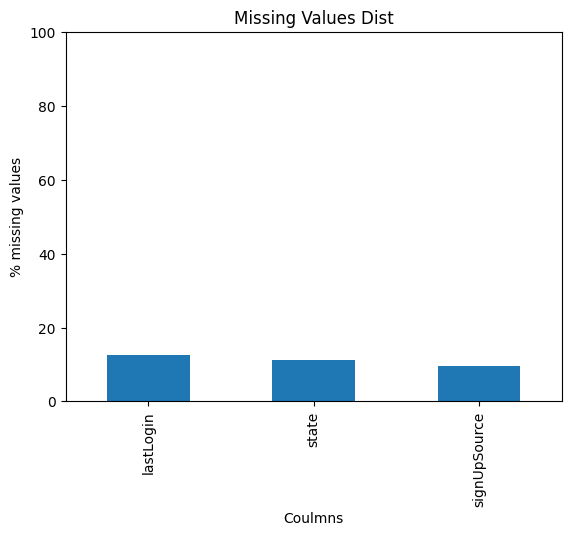

In [12]:
# We start with examining missing values for each table. 

missing_users = users.isnull().sum().sort_values(ascending=False)
missing_users = (missing_users * 100)/users.shape[0]
missing_users = missing_users[missing_users > 0]

plt.title('Missing Values Dist')

plt.xlabel('Coulmns')
plt.ylabel('% missing values')
plt.ylim((0, 100))
missing_users.plot.bar()

<Axes: title={'center': 'Missing Values Dist'}, xlabel='Coulmns', ylabel='% missing values'>

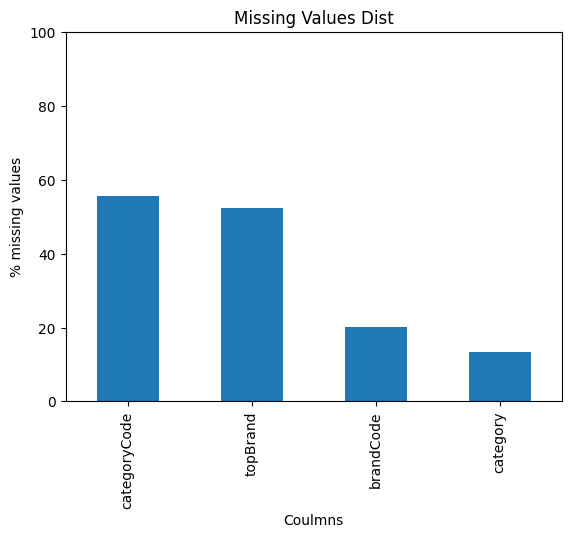

In [13]:
# missing values for brands

missing_brands = brands.isnull().sum().sort_values(ascending=False)
missing_brands = (missing_brands * 100)/brands.shape[0]
missing_brands = missing_brands[missing_brands > 0]

plt.title('Missing Values Dist')

plt.xlabel('Coulmns')
plt.ylabel('% missing values')
plt.ylim((0, 100))
missing_brands.plot.bar()

<Axes: title={'center': 'Missing Values Dist'}, xlabel='Coulmns', ylabel='% missing values'>

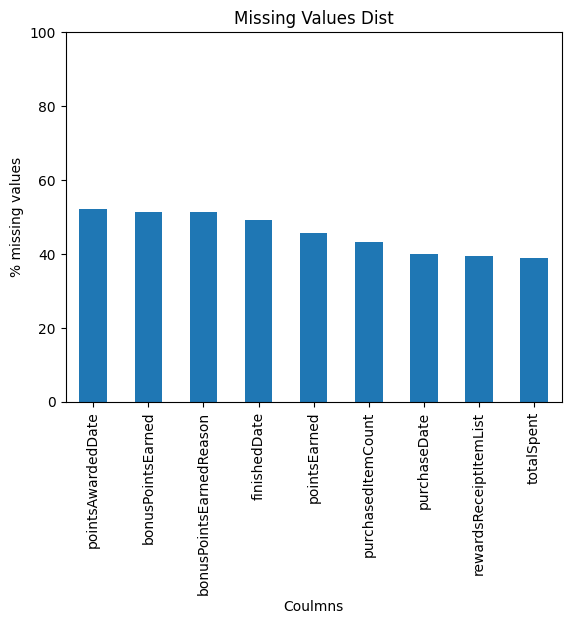

In [14]:
# missing values for receipts

missing_receipts = receipts.isnull().sum().sort_values(ascending=False)
missing_receipts = (missing_receipts * 100)/receipts.shape[0]
missing_receipts = missing_receipts[missing_receipts > 0]

plt.title('Missing Values Dist')
plt.xlabel('Coulmns')
plt.ylabel('% missing values')
plt.ylim((0, 100))
missing_receipts.plot.bar()

<Axes: title={'center': 'Missing Values Dist'}, xlabel='Coulmns', ylabel='% missing values'>

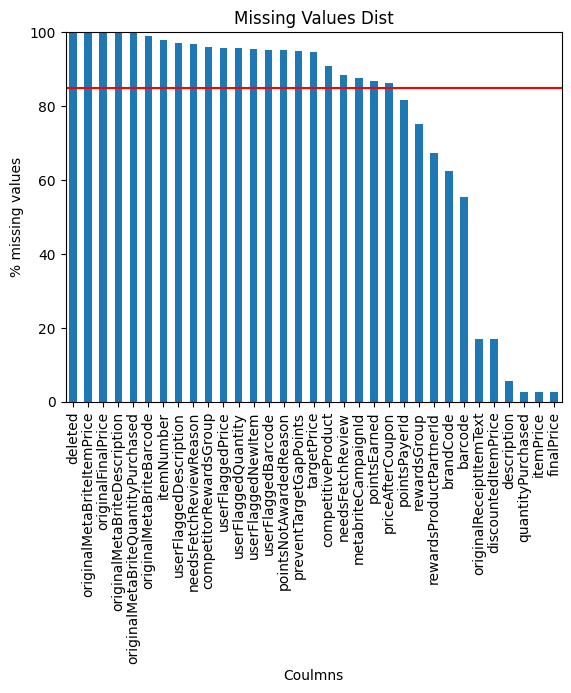

In [15]:
# missing values for items

missing_items = items.isnull().sum().sort_values(ascending=False)
missing_items = (missing_items * 100)/items.shape[0]
missing_items = missing_items[missing_items > 0]

plt.title('Missing Values Dist')
plt.xlabel('Coulmns')
plt.ylabel('% missing values')
plt.axhline(y=85, color='r')
plt.ylim((0, 100))
missing_items.plot.bar()

Upon examining the missing values for each table, the major concern is in the `items` table where there are __22__ features with more than 85% null values. Keeping in mind we dont have information on some of the features, missing values on such features is acceptable (eg. MetaBriteDesc, MetaBritePrice, etc.) but there are missing entries for features like __brandCode__ (which is a FK to the brands table) which will pose problems while joining items with brands. This is something that has to be communicated to the rest of the stakeholders.

Our next approach is to look for __outliers__ in the data to potentially detect any __fraudulent activities__. 

/Users/soumyadeepdasgupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: title={'center': 'Points Earned Dist'}, xlabel='pointsEarned'>

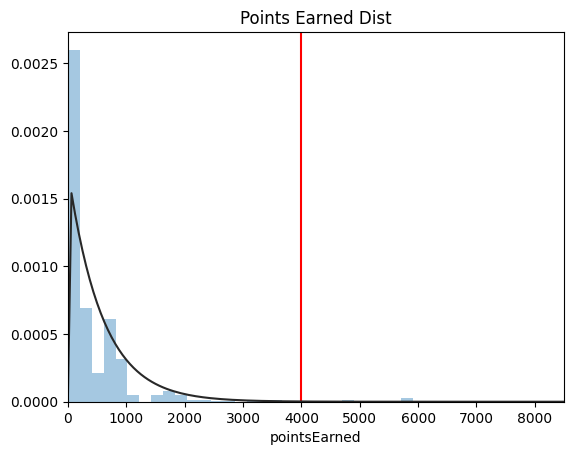

In [16]:
# Outlier Analysis - Points Earned

y = receipts['pointsEarned']
plt.title('Points Earned Dist')
plt.xlim((0, 8500))
plt.axvline(x=4000, c='r')
sns.distplot(y, kde=False, fit=st.expon, bins=50)


For Points Earned, we see an exponential trend with some entries at the tail end of the distribution.

<Axes: title={'center': 'Total Spend Dist'}, xlabel='totalSpent'>

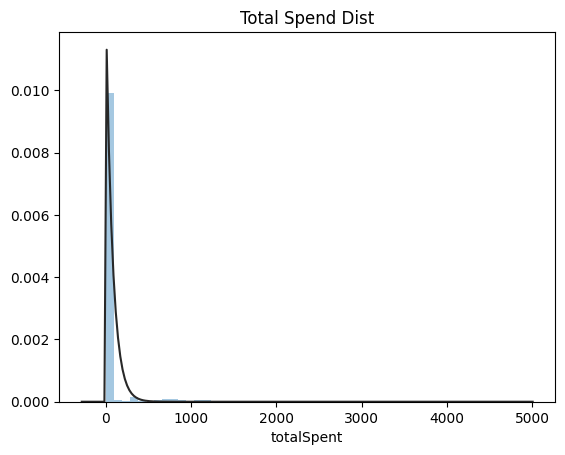

In [17]:
y = receipts['totalSpent']
plt.title('Total Spend Dist')
#plt.xlim((0, 1000))
#plt.axvline(x=4000, c='r')
sns.distplot(y, kde=False, fit=st.expon, bins=50)

#### Analyzing Customer Purchase behaviour
It is also helpful to understand the purchase dynamics of our customers. This can be done by looking at basic statistical figures like mean, median, IQR for each purchase item and spend on each receipt. 

In [18]:
# Item Price from the items table
pd.to_numeric(items['finalPrice']).describe()

count    6767.000000
mean        7.871661
std        14.656776
min         0.000000
25%         2.290000
50%         4.280000
75%         9.990000
max       441.580000
Name: finalPrice, dtype: float64

In [19]:
# Receipt Spent from receipts table
pd.to_numeric(receipts['totalSpent']).describe()

count     684.000000
mean       77.796857
std       347.110349
min         0.000000
25%         1.000000
50%        18.200000
75%        34.960000
max      4721.950000
Name: totalSpent, dtype: float64

With categorical data, we can use boxplots to check distribution of totalSpent with respect to categorical values and enumerate them. An interesting observation here is that there are a lot of values in the "Finished" category outside the upper whisker limit. 

<Axes: title={'center': 'Total Spent against Rewards Status'}, xlabel='rewardsReceiptStatus', ylabel='totalSpent'>

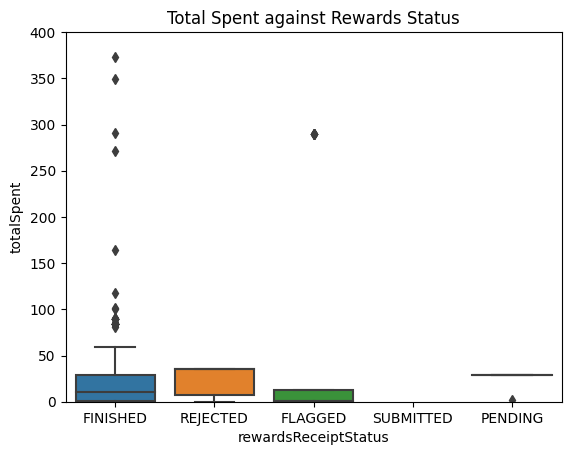

In [20]:
plt.title('Total Spent against Rewards Status')
plt.ylim((0, 400))
sns.boxplot(data=receipts, x='rewardsReceiptStatus', y='totalSpent')

### Part 4: Email to stakeholders
In this part I have communicated some of my concerns to the business stakeholders about the data.

Dear All,

This is Sohit. Hope you all are having a good day! I've spent some time analyzing the Fetch rewards datasets for the past couple of days and wanted to aprise everyone of my findings and concerns with the data. I would appreciate your inputs/feedback on these points. Some points are addressed to specific teams but feel free to write your inputs nonetheless:

- For the NLP team, Do we have a more comprehensive list of items extracted from the scanned receipts like itemNumber, item price, its description? There are significant amount of null values in the current dataset as a result of which we are missing on a lot of information about item puchases from the receipts.

- I have also observed some extreme values with regards to reward points earned (some exceeding 4000 points) and specifically amount spent on the approved cases (some more than 500USD on a single receipt) . Are these anomalies or incorrect data capture? I believe it is worth double-checking some of these cases.

- For the BA team, there are quite a few missing values for brand codes. This might lead to data inconsistencies in the event of any future changes in the brandCategory. Also, addressing this will also massively help optimize our database. 

- I am also having trouble understanding the relation between barcodes of items and barcodes of brands. Is there some logic that connects the two? 


- Finally, as we are growing, I anticipate a significant increase in user interation via APIs, hence, we must start working on incremental backup and recovery to avoid huge downtimes. Also, food for thought, since we are dealing json files for each entry, what are your views on using a database like MongoDB (NoSQL) instead of RDBMS?

I would really appreciate your inputs and thoughts on the above points. Feel free to connect with me if you feel a quick chat is necessary to resolve some of these issues. 

Best Regards,

Sohit. 